In [4]:
# Read all CSVs in folder Files as an unique df
import pandas as pd

import os

path = '../BirdNET/0_WatkinsMarineMammals/Predictions/RuidosVarios/Files'

files = os.listdir(path)

df = pd.concat([pd.read_csv(f'{path}/{file}') for file in files])

df

,Start (s),End (s),Scientific name,Common name,Confidence,File
0,0.0,3.0,SpinnerDolphin,SpinnerDolphin,0.9943,\\wsl.localhost\Ubuntu\home\gruncrow\Cetaceans...
1,0.0,3.0,SpermWhale,SpermWhale,0.9092,\\wsl.localhost\Ubuntu\home\gruncrow\Cetaceans...
2,0.0,3.0,CommonDolphin,CommonDolphin,0.3152,\\wsl.localhost\Ubuntu\home\gruncrow\Cetaceans...
3,3.0,6.0,SpinnerDolphin,SpinnerDolphin,0.9568,\\wsl.localhost\Ubuntu\home\gruncrow\Cetaceans...
4,3.0,6.0,CommonDolphin,CommonDolphin,0.1929,\\wsl.localhost\Ubuntu\home\gruncrow\Cetaceans...
...,...,...,...,...,...,...
31,48.0,51.0,SpinnerDolphin,SpinnerDolphin,0.2126,\\wsl.localhost\Ubuntu\home\gruncrow\Cetaceans...
32,48.0,51.0,CommonDolphin,CommonDolphin,0.1834,\\wsl.localhost\Ubuntu\home\gruncrow\Cetaceans...
33,51.0,54.0,SpinnerDolphin,SpinnerDolphin,0.1148,\\wsl.localhost\Ubuntu\home\gruncrow\Cetaceans...
34,54.0,57.0,SpinnerDolphin,SpinnerDolphin,0.9363,\\wsl.localhost\Ubuntu\home\gruncrow\Cetaceans...


In [14]:
# Unique Scientific name
df['Scientific name'].unique()

array(['SpinnerDolphin', 'SpermWhale', 'CommonDolphin', 'Long',
       'StripedDolphin', 'PantropicalSpottedDolphin'], dtype=object)

In [15]:
# Unique Common name
df['Common name'].unique()

array(['SpinnerDolphin', 'SpermWhale', 'CommonDolphin',
       'FinnedPilotWhale', 'StripedDolphin', 'PantropicalSpottedDolphin'],
      dtype=object)

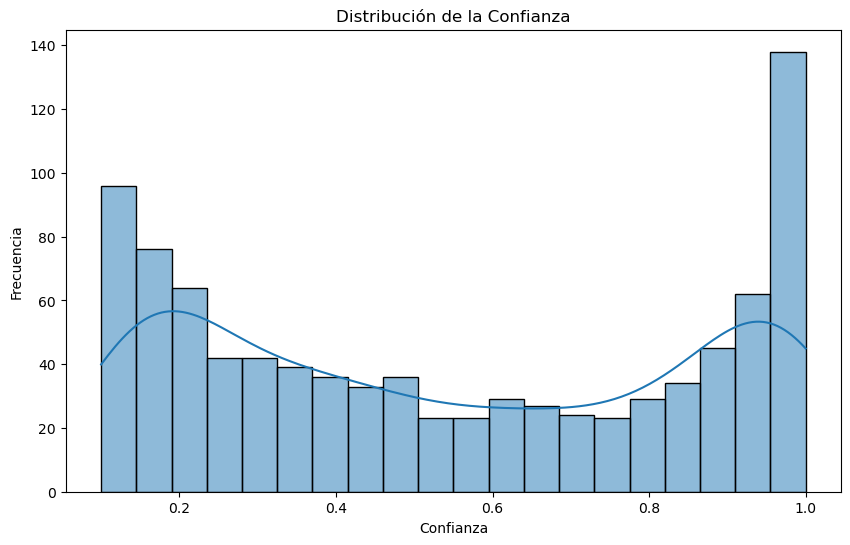

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Confidence'], bins=20, kde=True)
plt.title('Distribución de la Confianza')
plt.xlabel('Confianza')
plt.ylabel('Frecuencia')
plt.show()

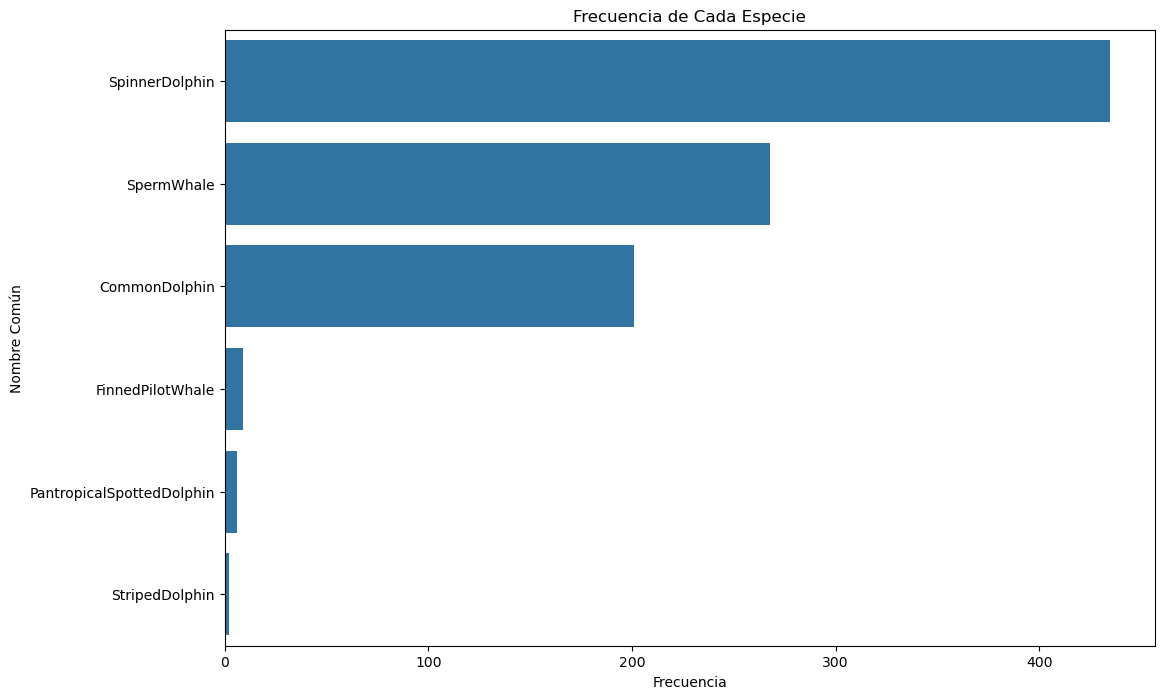

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Common name', data=df, order=df['Common name'].value_counts().index)
plt.title('Frecuencia de Cada Especie')
plt.xlabel('Frecuencia')
plt.ylabel('Nombre Común')
plt.show()

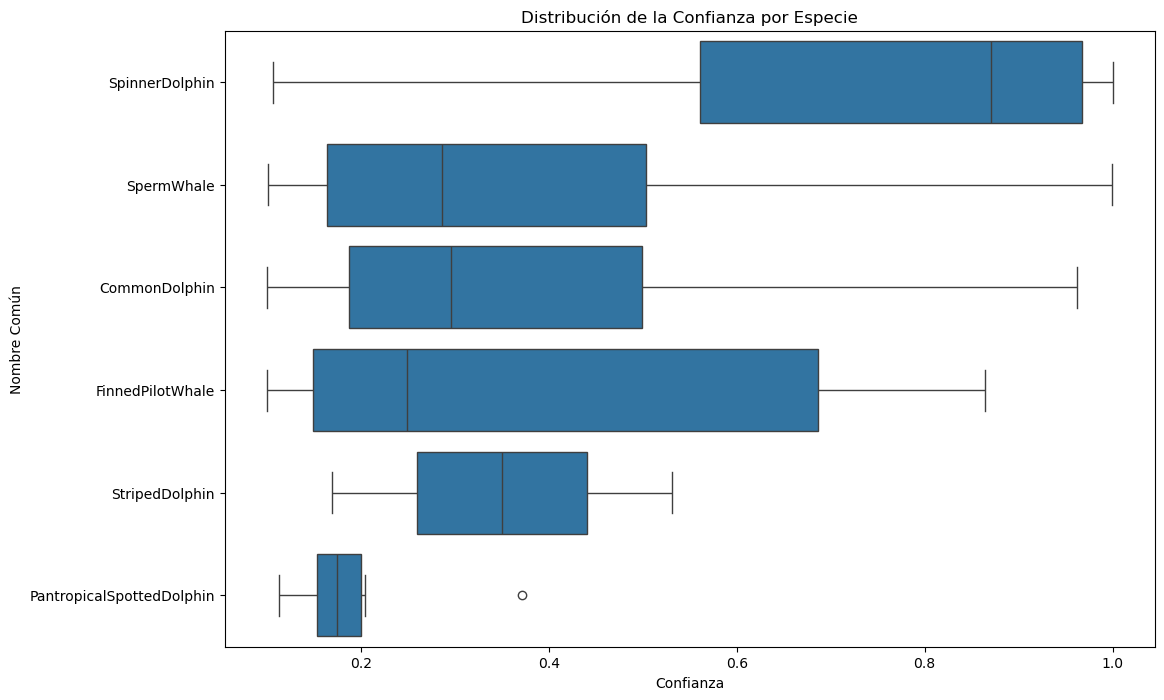

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Confidence', y='Common name', data=df)
plt.title('Distribución de la Confianza por Especie')
plt.xlabel('Confianza')
plt.ylabel('Nombre Común')
plt.show()

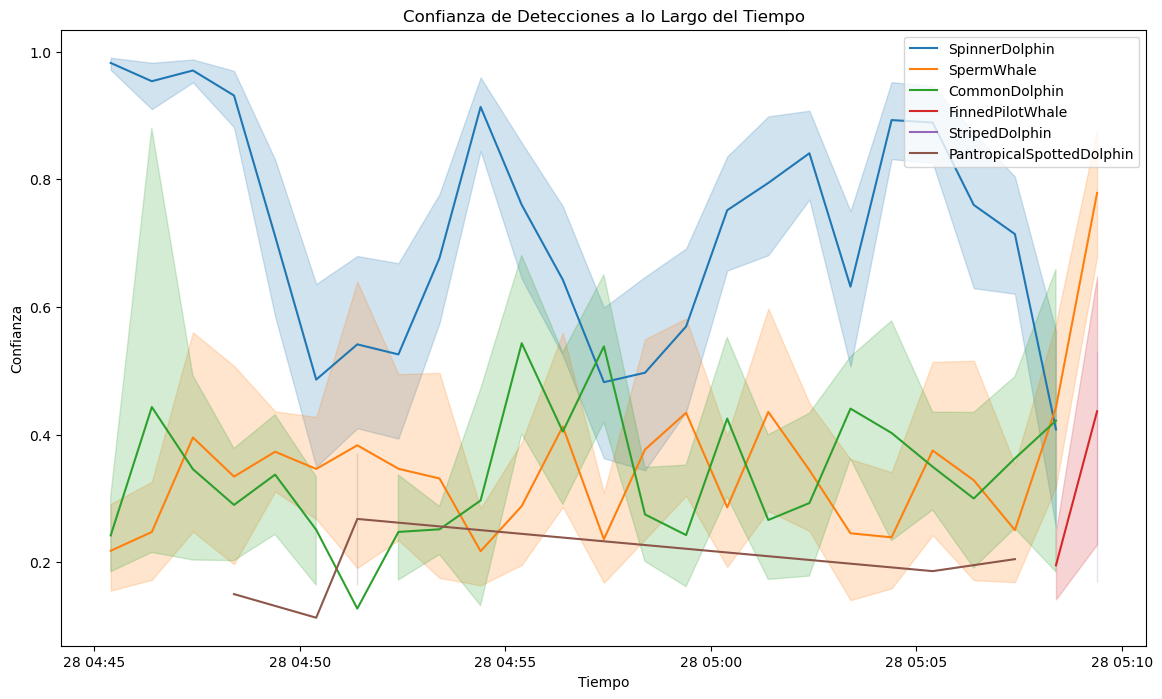

In [23]:
df['Timestamp'] = pd.to_datetime(df['File'].str.extract(r'(\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2})')[0], format='%Y-%m-%d_%H-%M-%S')

plt.figure(figsize=(14, 8))
sns.lineplot(x='Timestamp', y='Confidence', hue='Common name', data=df)
plt.title('Confianza de Detecciones a lo Largo del Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Confianza')
plt.legend(loc='upper right')
plt.show()

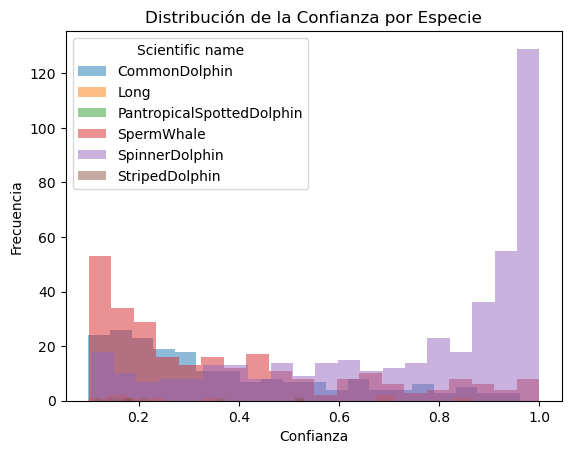

In [25]:
import matplotlib.pyplot as plt

# Agrupar por nombre científico y plotear histogramas de confianza
for name, group in df.groupby('Scientific name'):
    group['Confidence'].plot.hist(bins=20, alpha=0.5, label=name)

# Añadir leyenda
plt.legend(title='Scientific name')
plt.title('Distribución de la Confianza por Especie')
plt.xlabel('Confianza')
plt.ylabel('Frecuencia')
plt.show()

<Axes: ylabel='Frequency'>

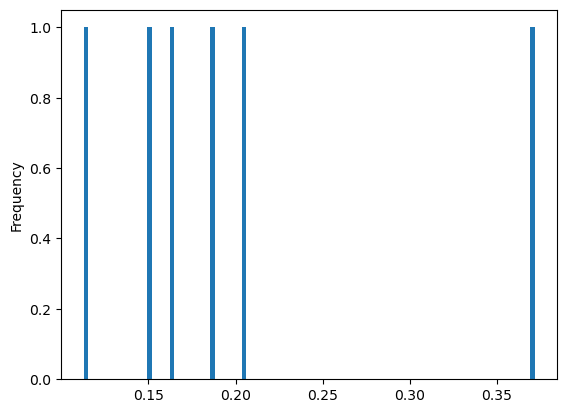

In [13]:
# Plot just pantropical spotted dolphin

df[df['Scientific name'] == 'PantropicalSpottedDolphin']['Confidence'].plot.hist(bins=100)